In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from keras.models import Model
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import cv2
import sklearn
import os
import seaborn as sns
from google.colab.patches import cv2_imshow
import glob

In [ ]:
 batch_size=16

In [ ]:
train_path="/content/drive/MyDrive/Capstone_data/Clahe_train"
test_path="/content/drive/MyDrive/Capstone_data/Clahe_test"

In [ ]:
train_normal = glob.glob(train_path+"/normal/*.jpeg")
train_pneumonia = glob.glob(train_path+"/pneumonia/*.jpeg")

test_normal = glob.glob(test_path+"/normal/*.jpeg")
test_pneumonia = glob.glob(test_path+"/pneuonia/*.jpeg")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,load_img,img_to_array

train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.4,
        zoom_range=0.3,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1/255.)

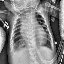

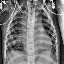

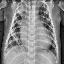

<Figure size 432x288 with 0 Axes>

In [ ]:

import cv2
import glob
down_width = 64
down_height = 64
down_points = (down_width, down_height)
path ="/content/drive/MyDrive/Capstone_data/Clahe_train/pneumonia/*.*"
i=1
for file in glob.glob(path):
  if i>3:
    break
  a= cv2.imread(file)
  img= cv2.resize(a, down_points, interpolation= cv2.INTER_LINEAR)
  cv2_imshow(img)
  i+=1
plt.tight_layout()

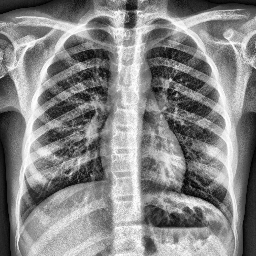

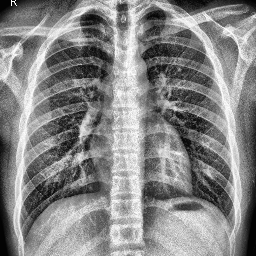

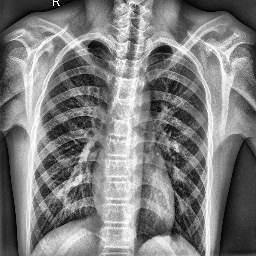

<Figure size 432x288 with 0 Axes>

In [ ]:

import cv2
import glob
down_width = 256
down_height = 256
down_points = (down_width, down_height)
path ="/content/drive/MyDrive/Capstone_data/Clahe_test/normal/*.*"
i=1
for file in glob.glob(path):
  if i>3:
    break
  a= cv2.imread(file)
  img= cv2.resize(a, down_points, interpolation= cv2.INTER_LINEAR)
  cv2_imshow(img)
  i+=1
plt.tight_layout()

In [ ]:
training_set=train_datagen.flow_from_directory(train_path,color_mode='rgb',target_size=(224,224),
                                               batch_size=16,class_mode='binary')

Found 5216 images belonging to 2 classes.


In [ ]:
test_set=test_datagen.flow_from_directory(test_path,color_mode='rgb',target_size=(224,224),
                                               batch_size=16,class_mode='binary')

Found 624 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

NameError: ignored

In [ ]:
# Part 2 - Building the CNN
# Initialising the CNN
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=model.fit(x = training_set, validation_data = test_set, epochs = 10)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
IMAGE_SIZE = [224, 224]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
folders = glob.glob("/content/drive/MyDrive/Capstone_data/Clahe_train/*")
folders

['/content/drive/MyDrive/Capstone_data/Clahe_train/normal',
 '/content/drive/MyDrive/Capstone_data/Clahe_train/pneumonia']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(2, activation='relu')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
x=len(train_normal)
y=len(train_pneumonia)
s1=(x+y)//batch_size
a=len(test_normal)
b=len(test_pneumonia)
s2=(a+b)//batch_size

In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=s1,
  validation_steps=s2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
326/326 [==============================] - 2473s 8s/step - loss: 7.7035 - accuracy: 0.7410 - val_loss: 7.6780 - val_accuracy: 0.6071
Epoch 2/20
326/326 [==============================] - 189s 579ms/step - loss: 7.6899 - accuracy: 0.7429 - val_loss: 7.6815 - val_accuracy: 0.6473
Epoch 3/20
326/326 [==============================] - 167s 511ms/step - loss: 7.6899 - accuracy: 0.7429 - val_loss: 7.6795 - val_accuracy: 0.6250
Epoch 4/20
326/326 [==============================] - 163s 500ms/step - loss: 7.6899 - accuracy: 0.7429 - val_loss: 7.6784 - val_accuracy: 0.6116
Epoch 5/20
326/326 [==============================] - 153s 470ms/step - loss: 7.6899 - accuracy: 0.7429 - val_loss: 7.6811 - val_accuracy: 0.6429
Epoch 6/20
326/326 [==============================] - 153s 468ms/step - loss: 7.6899 - accuracy: 0.7429 - val_loss: 7.6811 - val_accuracy: 0.6429
Epoch 7/20
326/326 [==============================] - 151s 463ms/step - loss: 7.6899 - accuracy: 0.7429 - val_loss: 7.6768 - v

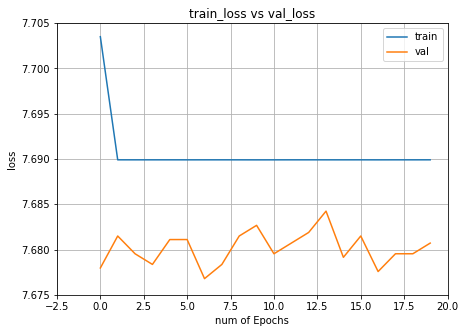

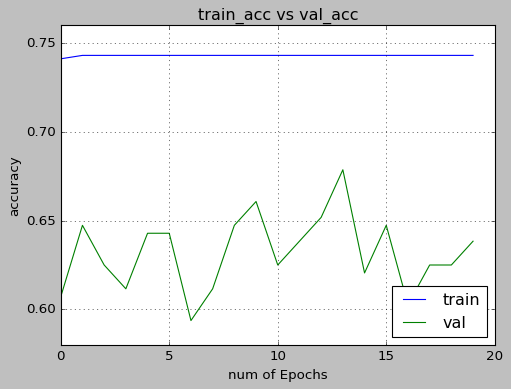

In [ ]:
train_loss=r.history['loss']
val_loss=r.history['val_loss']
train_acc=r.history['accuracy']
val_acc=r.history['val_accuracy']
xc=range(20)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
IMAGE_SIZE = [224, 224]
vgg2 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
vgg2.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model=Sequential()
for layer in vgg2.layers:
    layer.trainable = False
    model.add(layer)


In [ ]:
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
folders = glob.glob("/content/drive/MyDrive/Capstone_data/Clahe_train/*")
folders

['/content/drive/MyDrive/Capstone_data/Clahe_train/normal',
 '/content/drive/MyDrive/Capstone_data/Clahe_train/pneumonia']

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
x=len(train_normal)
y=len(train_pneumonia)
s1=(x+y)//batch_size
a=len(test_normal)
b=len(test_pneumonia)
s2=(a+b)//batch_size

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)

In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=s1,
  validation_steps=s2,
  callbacks=[callback]
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/30
326/326 [==============================] - 127s 389ms/step - loss: 0.1973 - accuracy: 0.9197 - val_loss: 0.2857 - val_accuracy: 0.8884
Epoch 2/30
326/326 [==============================] - 127s 390ms/step - loss: 0.1919 - accuracy: 0.9241 - val_loss: 0.3334 - val_accuracy: 0.8661
Epoch 3/30
326/326 [==============================] - 128s 391ms/step - loss: 0.1856 - accuracy: 0.9237 - val_loss: 0.3308 - val_accuracy: 0.8795
Epoch 4/30
326/326 [==============================] - 126s 386ms/step - loss: 0.1930 - accuracy: 0.9239 - val_loss: 0.2487 - val_accuracy: 0.9152
Epoch 5/30
326/326 [==============================] - 126s 387ms/step - loss: 0.1911 - accuracy: 0.9212 - val_loss: 0.3118 - val_accuracy: 0.8929
Epoch 6/30
326/326 [==============================] - 127s 390ms/step - loss: 0.1867 - accuracy: 0.9285 - val_loss: 0.2384 - val_accuracy: 0.9330
Epoch 7/30
326/326 [==============================] - 127s 388ms/step - loss: 0.1874 - accuracy: 0.9264 - val_loss: 0.4866 -

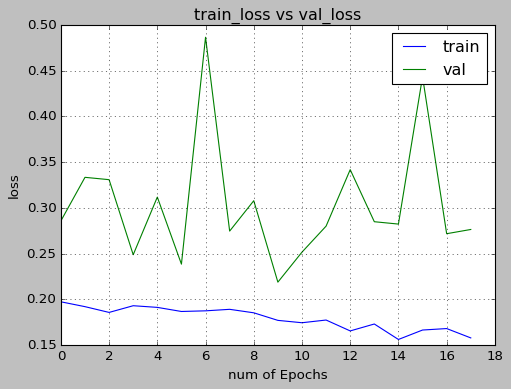

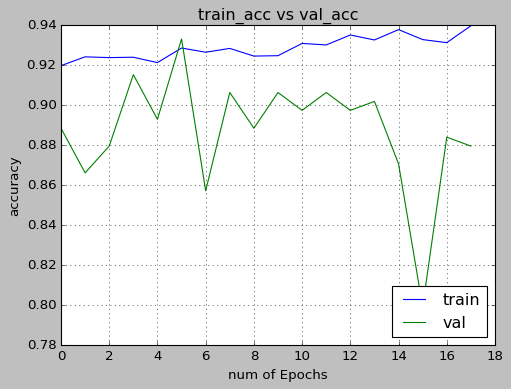

In [ ]:
train_loss=r.history['loss']
val_loss=r.history['val_loss']
train_acc=r.history['accuracy']
val_acc=r.history['val_accuracy']
xc=range(18)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Capstone_data/vgg19_model.hdf5')

NameError: ignored

In [ ]:
training_set=train_datagen.flow_from_directory(train_path,color_mode='rgb',target_size=(224,224),
                                               batch_size=16,class_mode='binary')

Found 5216 images belonging to 2 classes.


In [ ]:
test_set=test_datagen.flow_from_directory(test_path,color_mode='rgb',target_size=(224,224),
                                               batch_size=16,class_mode='binary')

Found 624 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(1,activation='sigmoid'))

In [ ]:
resnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_1 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
resnet_model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
x=len(train_normal)
y=len(train_pneumonia)
s1=(x+y)//batch_size
a=len(test_normal)
b=len(test_pneumonia)
s2=(a+b)//batch_size

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)

In [ ]:
r2 = resnet_model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=s1,
  validation_steps=s2,
  callbacks=[callback]
)

NameError: ignored

In [ ]:
train_loss=r2.history['loss']
val_loss=r2.history['val_loss']
train_acc=r2.history['accuracy']
val_acc=r2.history['val_accuracy']
xc=range(20)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

NameError: ignored